<a href="https://colab.research.google.com/github/dhairyachandra/CSEE5590-Python-Deep-Learning-Programming/blob/master/Lab2/Source/Ques4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  0%|          | 208/156060 [00:00<01:15, 2074.75it/s]

   PhraseId  ...  Sentiment
0         1  ...          1
1         2  ...          2
2         3  ...          2
3         4  ...          2
4         5  ...          2

[5 rows x 4 columns]


100%|██████████| 66292/66292 [00:32<00:00, 2045.67it/s]


156060
66292


100%|██████████| 124848/124848 [00:00<00:00, 571930.56it/s]


13731
48
(124848, 48) (31212, 48) (66292, 48)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 48, 300)           4119300   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 44, 64)            96064     
_________________________________________________________________
dropout_4 (Dropout)          (None, 44, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 40, 64)            20544     
_________________________________________________________________
dropout_5 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 40, 100)           6500      
_________________________________________________________________
dropout_

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124848 samples, validate on 31212 samples
Epoch 1/10
124848/124848 [==============================] - 6s 45us/step - loss: 1.0625 - accuracy: 0.5776 - val_loss: 0.9937 - val_accuracy: 0.6258
Epoch 2/10
  4864/124848 [>.............................] - ETA: 4s - loss: 0.8949 - accuracy: 0.6388

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


124848/124848 [==============================] - 5s 42us/step - loss: 0.9097 - accuracy: 0.6322 - val_loss: 0.9385 - val_accuracy: 0.6388
Epoch 3/10
124848/124848 [==============================] - 5s 43us/step - loss: 0.8667 - accuracy: 0.6499 - val_loss: 0.9204 - val_accuracy: 0.6437
Epoch 4/10
124848/124848 [==============================] - 5s 43us/step - loss: 0.8465 - accuracy: 0.6562 - val_loss: 0.8998 - val_accuracy: 0.6460
Epoch 5/10
124848/124848 [==============================] - 5s 42us/step - loss: 0.8253 - accuracy: 0.6671 - val_loss: 0.8881 - val_accuracy: 0.6399
Epoch 6/10
124848/124848 [==============================] - 5s 42us/step - loss: 0.8185 - accuracy: 0.6700 - val_loss: 0.9076 - val_accuracy: 0.6279
Epoch 7/10
124848/124848 [==============================] - 5s 43us/step - loss: 0.8070 - accuracy: 0.6731 - val_loss: 0.8853 - val_accuracy: 0.6344
Epoch 8/10
124848/124848 [==============================] - 5s 43us/step - loss: 0.8009 - accuracy: 0.6755 - val_loss

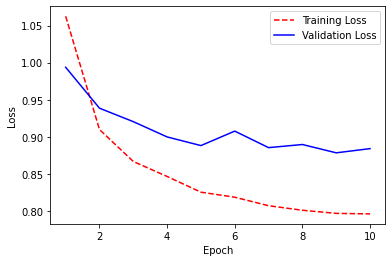

In [4]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
from keras.utils import to_categorical
import random
import tensorflow
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,Conv1D,MaxPooling1D,Flatten
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
lemmatizer = WordNetLemmatizer()

#set random seed for the session and also for tensorflow that runs in background for keras
tensorflow.random.set_seed(123)
random.seed(123)

train= pd.read_csv("/content/drive/My Drive/UMKC/Colab Files/Task 4 - Data/train.tsv", sep="\t")
test = pd.read_csv("/content/drive/My Drive/UMKC/Colab Files/Task 4 - Data/test.tsv", sep="\t")

print(train.head())
train.shape
test.head()


def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Phrase']):
        # remove html content
        review_text = BeautifulSoup(sent).get_text()

        # remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]", " ", review_text)

        # tokenize the sentences
        words = word_tokenize(review_text.lower())

        # lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]

        reviews.append(lemma_words)

    return (reviews)


# cleaned reviews for both train and test set retrieved
train_sentences = clean_sentences(train)
test_sentences = clean_sentences(test)
print(len(train_sentences))
print(len(test_sentences))

target=train.Sentiment.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]

X_train,X_val,y_train,y_val=train_test_split(train_sentences,y_target,test_size=0.2,stratify=y_target)

#It is needed for initializing tokenizer of keras and subsequent padding

unique_words = set()
len_max = 0

for sent in tqdm(X_train):

    unique_words.update(sent)

    if (len_max < len(sent)):
        len_max = len(sent)

# length of the list of unique_words gives the no of unique words
print(len(list(unique_words)))
print(len_max)

tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(test_sentences)

#padding done to equalize the lengths of all input reviews. CNN networks needs all inputs to be same length.
#Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.
X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_val = sequence.pad_sequences(X_val, maxlen=len_max)
X_test = sequence.pad_sequences(X_test, maxlen=len_max)
print(X_train.shape,X_val.shape,X_test.shape)

early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

#Model using Keras CNN
model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add(Conv1D(64,5,activation= 'tanh'))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,activation= 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=10, batch_size=256, verbose=1, callbacks=callback)


# Create count of the number of epochs
epoch_count = range(1, len(history.history['loss']) + 1)

# Visualize learning curve.
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()